In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# abertura arquivo treino
treino = pd.read_csv("D:/puc/oficina maker machine learning/drive_trabalho/treino.csv")

In [5]:
treino.head()

,HS_CPF,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,...,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,93036,1800,0,1,0,0,0,0,-9998,8,...,36,0,0,0,0,0,0,0,0,0
1,301999,1500,6,1,0,0,0,0,-9998,10,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,97233,8000,0,4,1,3,0,0,1,1,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,189292,4500,3,4,4,0,0,0,1,1,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,382690,3000,2,2,1,0,0,0,5,5,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [10]:
treino.columns

Index(['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA', 'QTDDECLARACAO10',
       'QTDDECLARACAOREST10', 'QTDDECLARACAOPAGAR10',
       'RESTITUICAOAGENCIAALTARENDA', 'BOLSAFAMILIA', 'ANOSULTIMARESTITUICAO',
       'ANOSULTIMADECLARACAO', 'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP',
       'PERCENTMASCCEP', 'PERCENTFEMCEP', 'PERCENTANALFABETOCEP',
       'PERCENTPRIMARIOCEP', 'PERCENTFUNDAMENTALCEP', 'PERCENTMEDIOCEP',
       'PERCENTSUPERIORCEP', 'PERCENTMESTRADOCEP', 'PERCENTDOUTORADOCEP',
       'PERCENTBOLSAFAMILIACEP', 'PERCENTFUNCIONARIOPUBLICOCEP',
       'MEDIARENDACEP', 'PIBMUNICIPIO', 'QTDUTILITARIOMUNICIPIO',
       'QTDAUTOMOVELMUNICIPIO', 'QTDCAMINHAOMUNICIPIO',
       'QTDCAMINHONETEMUNICIPIO', 'QTDMOTOMUNICIPIO', 'PERCENTPOPZONAURBANA',
       'IDHMUNICIPIO', 'INDICEEMPREGO', 'PORTEEMPREGADOR', 'SOCIOEMPRESA',
       'FUNCIONARIOPUBLICO', 'SEGMENTACAO', 'SEGMENTACAOCOBRANCA',
       'SEGMENTACAOECOM', 'SEGMENTACAOFIN', 'SEGMENTACAOTELECOM', 'SAFRA',
       'TEMPOCPF'

In [11]:
# Exclusão de colunas: Lei 12414 e requisitos

colunas_excluir = ["ORIENTACAO_SEXUAL","RELIGIAO","SAFRA","BOLSAFAMILIA","BOLSAFAMILIACASA","DISTCENTROCIDADE","DISTZONARISCO","IDADEMEDIACEP","IDHMUNICIPIO","MEDIARENDACEP","PERCENTMASCCEP",
"PERCENTFEMCEP","PERCENTANALFABETOCEP","PERCENTPRIMARIOCEP","PERCENTPOPZONAURBANA","PERCENTFUNDAMENTALCEP","PERCENTMEDIOCEP","PERCENTSUPERIORCEP","PERCENTMESTRADOCEP","PERCENTDOUTORADOCEP",
"PERCENTBOLSAFAMILIACEP","PERCENTFUNCIONARIOPUBLICOCEP","PIBMUNICIPIO","QTDENDERECO","QTDUTILITARIOMUNICIPIO","QTDAUTOMOVELMUNICIPIO","QTDCAMINHAOMUNICIPIO",
"QTDCAMINHONETEMUNICIPIO","QTDMOTOMUNICIPIO"]

In [ ]:
treino = treino.drop(columns = colunas_excluir)

In [12]:
treino.shape

(228139, 42)

In [13]:
## correlação entre atributos
correl = treino.corr()

In [16]:
## identificando as variáveis com correlação >= 70%
var_maior = correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool))

In [18]:
result = [column for column in var_maior.columns if any(var_maior[column] >= 0.7)]
result

['QTDDECLARACAO10',
 'QTDDECLARACAOREST10',
 'QTDDECLARACAOPAGAR10',
 'RESTITUICAOAGENCIAALTARENDA',
 'INDICEEMPREGO',
 'PORTEEMPREGADOR',
 'SOCIOEMPRESA',
 'FUNCIONARIOPUBLICO',
 'SEGMENTACAO',
 'SEGMENTACAOCOBRANCA',
 'SEGMENTACAOECOM',
 'SEGMENTACAOFIN',
 'SEGMENTACAOTELECOM',
 'QTDEMAIL',
 'QTDCELULAR',
 'CELULARPROCON',
 'QTDFONEFIXO',
 'TELFIXOPROCON',
 'MENORRENDACASA',
 'MAIORRENDACASA',
 'SOMARENDACASA',
 'MEDIARENDACASA',
 'MAIORIDADECASA',
 'MENORIDADECASA',
 'MEDIAIDADECASA',
 'INDICMENORDEIDADE',
 'COBRANCABAIXOCASA',
 'COBRANCAMEDIOCASA',
 'COBRANCAALTACASA',
 'SEGMENTACAOFINBAIXACASA',
 'SEGMENTACAOFINMEDIACASA',
 'SEGMENTACAOALTACASA',
 'FUNCIONARIOPUBLICOCASA']

In [20]:
## excluindo colunas com correlação alta e salvando os dados em um novo DF
df = treino.drop(columns=result)
df.shape

(228139, 9)

In [21]:
df.columns

Index(['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA',
       'ANOSULTIMARESTITUICAO', 'ANOSULTIMADECLARACAO',
       'ANOSULTIMADECLARACAOPAGAR', 'TEMPOCPF', 'TARGET', 'QTDPESSOASCASA'],
      dtype='object')

## Estatísticas

In [30]:
df.describe().round(2)

,HS_CPF,ESTIMATIVARENDA,QTDDECLARACAOISENTA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TEMPOCPF,TARGET,QTDPESSOASCASA
count,228139.00,228139.00,228139.00,228139.00,228139.00,228139.00,228139.00,228139.00,228139.00
mean,191491.35,2977.43,-159.44,-8285.75,-6431.87,-9019.52,-332.20,0.15,-6179.78
std,111542.83,4846.53,1256.76,3767.28,4790.84,2971.59,1833.61,0.36,4859.36
min,1.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,0.00,-9999.00
25%,95447.50,900.00,0.00,-9998.00,-9998.00,-9998.00,8.00,0.00,-9999.00
50%,190473.00,1100.00,0.00,-9998.00,-9998.00,-9998.00,15.00,0.00,-9999.00
75%,286373.50,4000.00,1.00,-9998.00,1.00,-9998.00,24.00,0.00,2.00
max,391458.00,30000.00,9.00,18.00,21.00,18.00,27.00,1.00,10.00


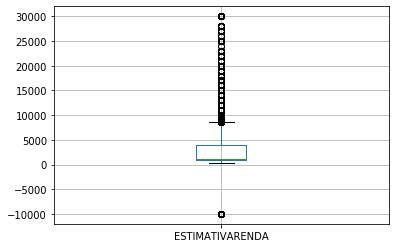

In [24]:
df.boxplot('ESTIMATIVARENDA')

In [31]:
df[df['ESTIMATIVARENDA']<0].shape

(3662, 9)

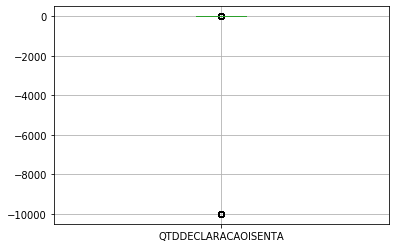

In [32]:
df.boxplot('QTDDECLARACAOISENTA')

In [33]:
df[df['QTDDECLARACAOISENTA']<0].shape

(3662, 9)

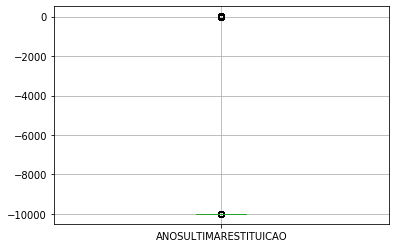

In [34]:
df.boxplot('ANOSULTIMARESTITUICAO')

In [37]:
# Deu muitos registros !!!!
df[df['ANOSULTIMARESTITUICAO']<0].shape[0]

189079

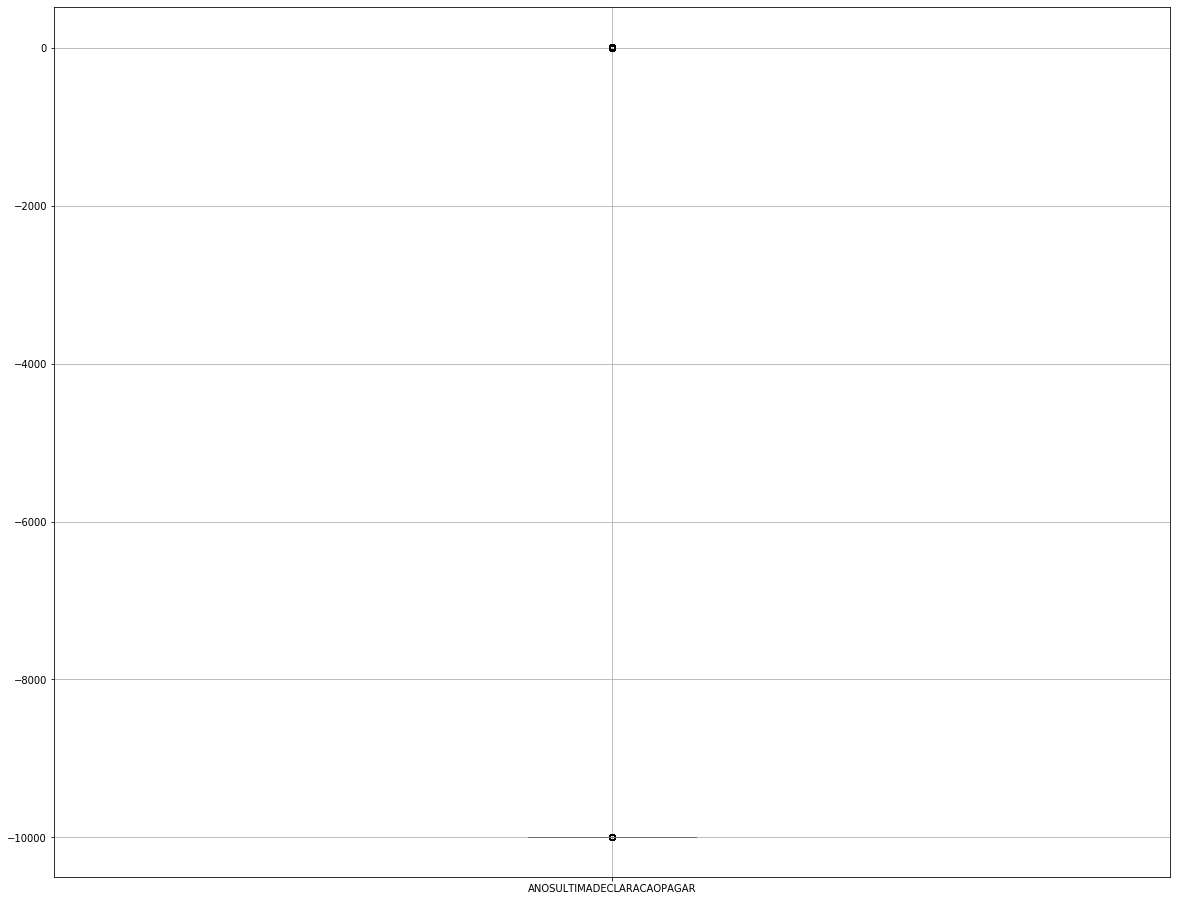

In [45]:
df.boxplot('ANOSULTIMADECLARACAOPAGAR')

In [47]:
df[df['ANOSULTIMADECLARACAOPAGAR']<0].shape[0]

205822

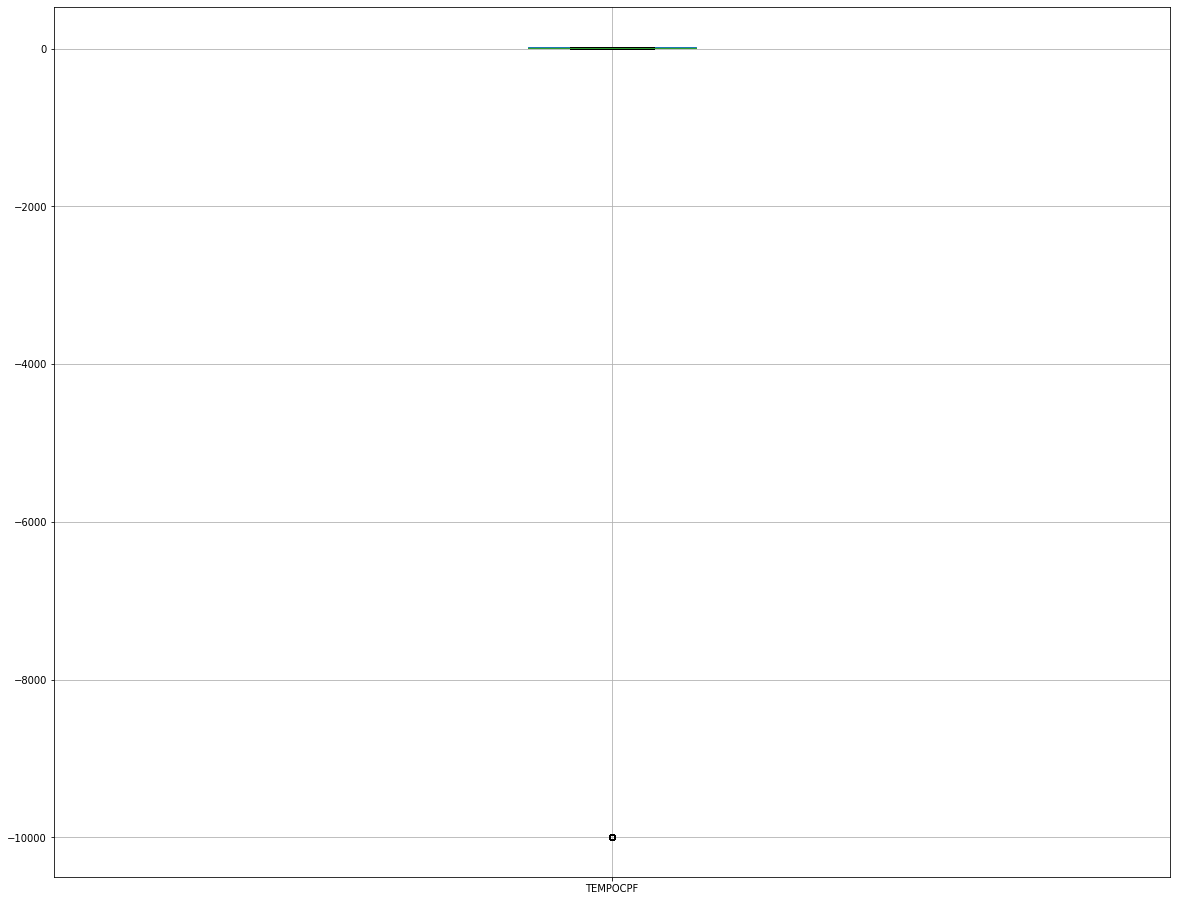

In [48]:
df.boxplot('TEMPOCPF')

In [49]:
df[df['TEMPOCPF']<0].shape[0]

7923

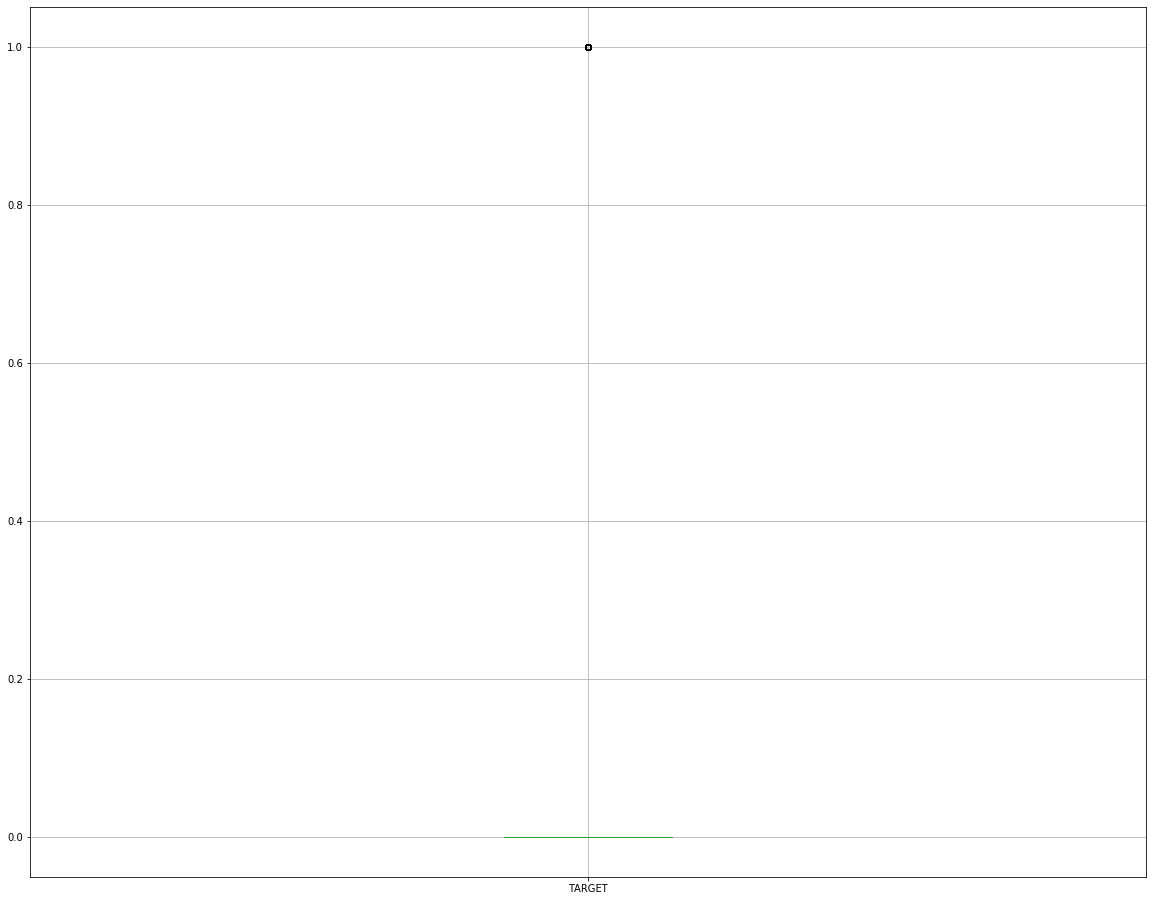

In [50]:
df.boxplot('TARGET')

In [51]:
df[df['TARGET']<0].shape[0]

0

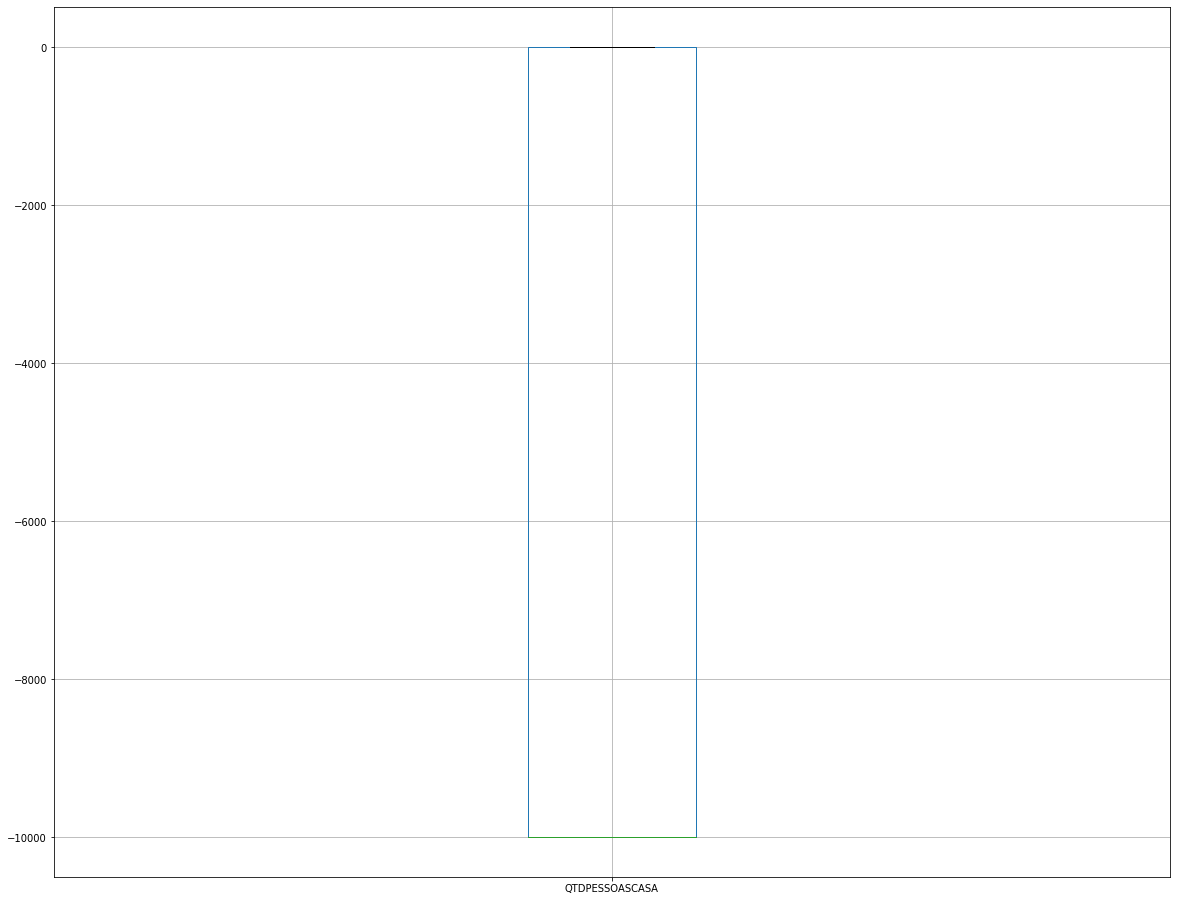

In [52]:
df.boxplot('QTDPESSOASCASA')

In [53]:
df[df['QTDPESSOASCASA']<0].shape[0]

141025

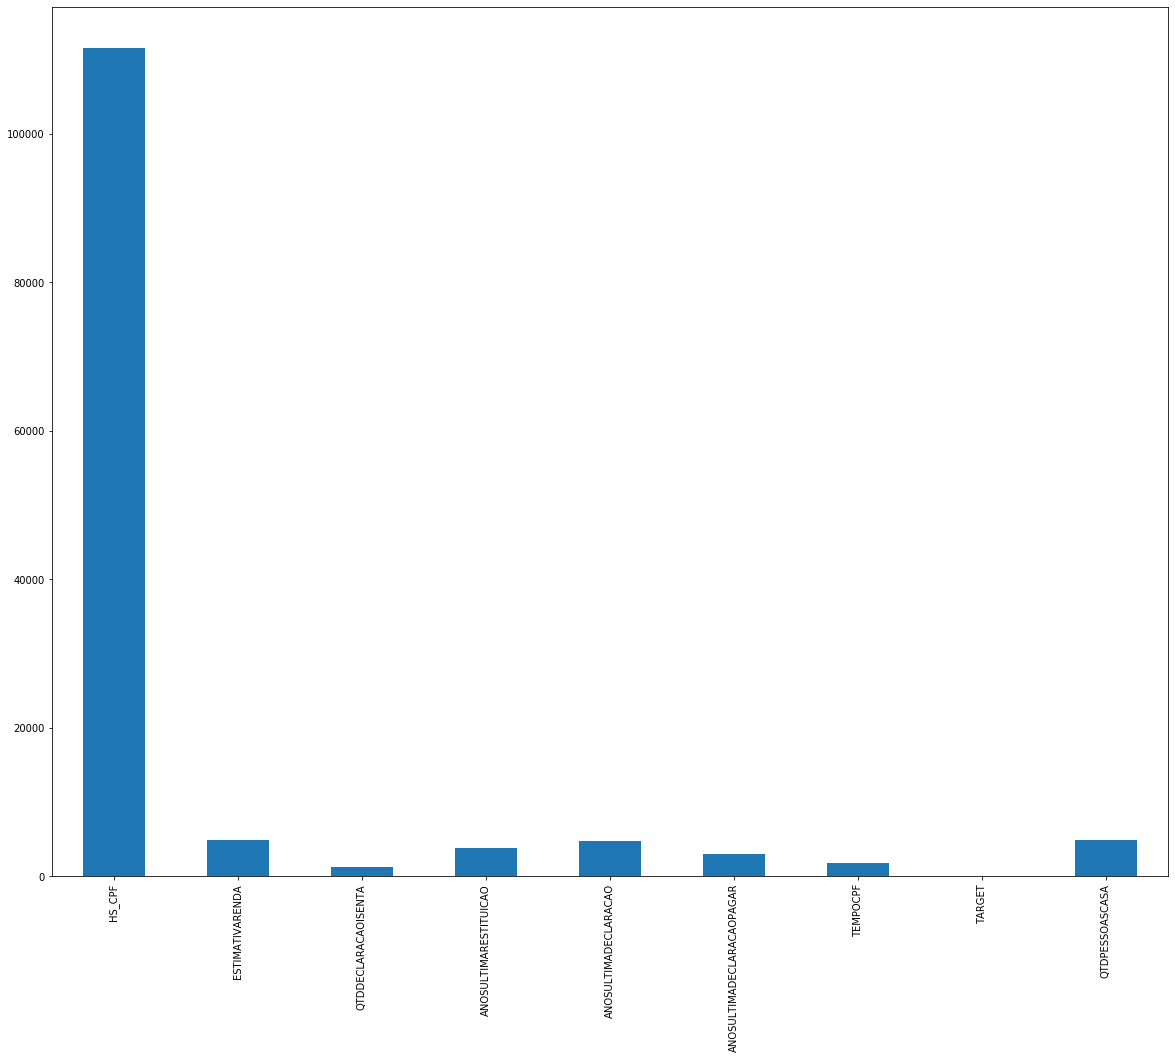

In [54]:
%matplotlib inline
plt.rc('figure', figsize=(20, 16))
df.std().plot.bar()

# Excluíndo registro inconsistentes do atributo estimativa de renda

In [56]:
df2 = df.query("ESTIMATIVARENDA >= 0").reset_index(drop=True)
df2.replace(-9998,np.NaN, inplace=True)
df2.replace(-9999,np.NaN, inplace=True)



In [58]:
# Conferindo exclusão
df2[df2['ESTIMATIVARENDA']<0].shape[0]

0

In [59]:
## Fillna para preencher 
df2.loc[df2.TARGET == 0,:] = df2.loc[df2.TARGET == 0,:].apply(lambda x: x.fillna(x.median()))
df2.loc[df2.TARGET == 1,:] = df2.loc[df2.TARGET == 1,:].apply(lambda x: x.fillna(x.median()))

In [64]:
df2.head()

,HS_CPF,ESTIMATIVARENDA,QTDDECLARACAOISENTA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TEMPOCPF,TARGET,QTDPESSOASCASA
0,93036,1800,0,1.0,8.0,3.0,11.0,0.0,2.0
1,301999,1500,6,1.0,10.0,3.0,26.0,0.0,3.0
2,97233,8000,0,1.0,1.0,3.0,26.0,0.0,3.0
3,189292,4500,3,1.0,1.0,3.0,17.0,1.0,3.0
4,382690,3000,2,5.0,5.0,3.0,17.0,0.0,3.0


In [66]:
# Retorna False se não tiver NaN no dataframe
check = df2.isnull().values.any()
print (check)

False


In [84]:
df2['TARGET'].value_counts()

0.0    191900
1.0     32577
Name: TARGET, dtype: int64

In [94]:
# Trabalhando com os quartis de 1,5, mas excluiria muitos registros (191900 - 178284)
# Não foi aplicado
ESTIMATIVARENDA = df2['ESTIMATIVARENDA']
Q1 = ESTIMATIVARENDA.quantile(.25)
Q3 = ESTIMATIVARENDA.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = ( ESTIMATIVARENDA>=limite_inferior) & (ESTIMATIVARENDA <= limite_superior)
dados_new = df2[selecao]

dados_new['TARGET'].value_counts()

0.0    178284
1.0     31442
Name: TARGET, dtype: int64

In [ ]:
df2.to_csv("D:/puc/oficina maker machine learning/drive_trabalho/treino_limpo.csv",index = True)